# 🏦 **Task 2: Credit Risk Prediction**
## **Objective:**
Predict whether a loan applicant is likely to default ona loan.

## **Dataset:**
Loan Prediction Dataset (available on kaggle)

## **Instructions:**
➡️ Handle missing data appropriately.
➡️ Visualize key features such a sloan amount, education and income.
➡️ Train a calssification model using Logistic Regression or Decision Tree
➡️ Evaluate the model using accuracy, confusion matrix

## Load the data

### Subtask:
Load the Loan Prediction Dataset from the specified path.


**Reasoning**:
Import pandas and load the dataset into a DataFrame and display the head.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/loan_approval_dataset.csv')
print(df.head())

   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

**Reasoning**:
The previous attempt to load the dataset failed because the file was not found. I will try loading the dataset from a different path, assuming it might be located in the `/data` directory based on common practices in such environments.



## Handle missing data

### Subtask:
Address missing values in the dataset using appropriate techniques (e.g., imputation).


**Reasoning**:
Check for missing values in the DataFrame.



In [ ]:
print(df.isnull().sum())

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


## Visualize key features

### Subtask:
Create visualizations to explore the relationships between loan amount, education, income, and loan status.


**Reasoning**:
Generate visualizations to explore the distributions of 'loan_amount' and 'income_annum', the distribution of 'education' and its relationship with 'loan_status', and the relationships between 'loan_amount', 'income_annum', and 'loan_status' using appropriate plot types.



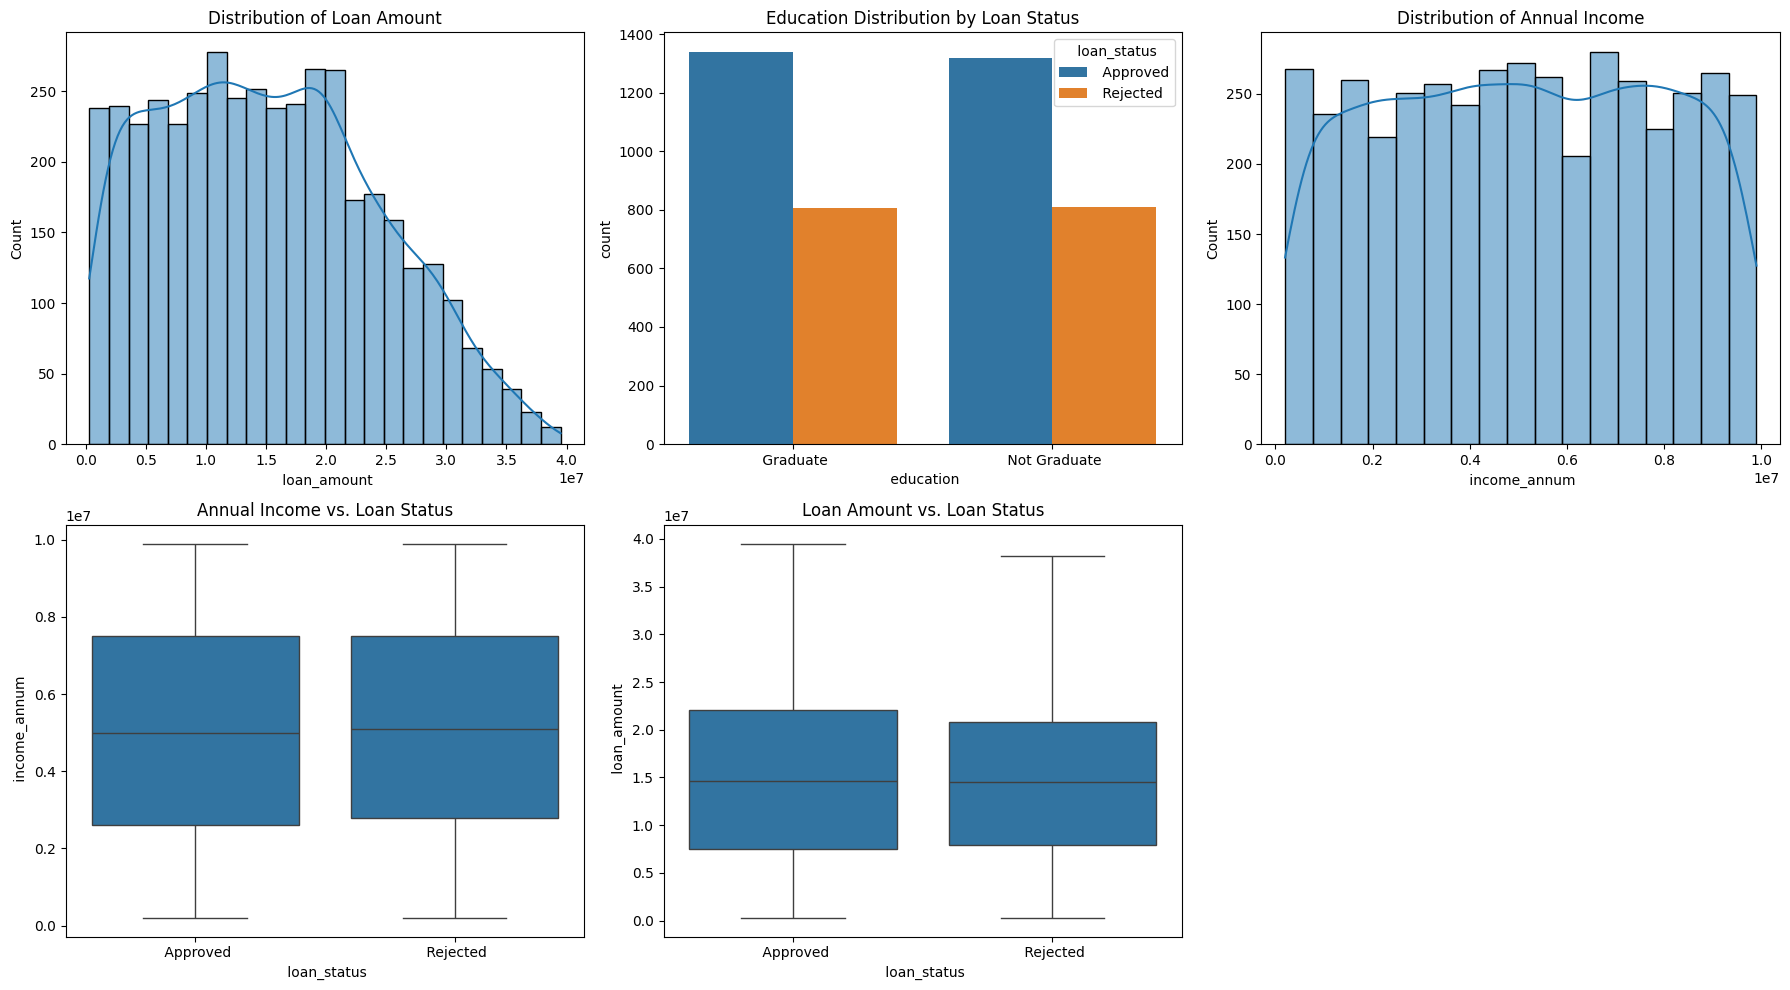

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 10))

# 1. Histogram of 'loan_amount'
plt.subplot(2, 3, 1)
sns.histplot(df[' loan_amount'], kde=True)
plt.title('Distribution of Loan Amount')

# 2. Bar plot of 'education' separated by 'loan_status'
plt.subplot(2, 3, 2)
sns.countplot(data=df, x=' education', hue=' loan_status')
plt.title('Education Distribution by Loan Status')

# 3. Histogram of 'income_annum'
plt.subplot(2, 3, 3)
sns.histplot(df[' income_annum'], kde=True)
plt.title('Distribution of Annual Income')

# 4. Box plot of 'income_annum' and 'loan_status'
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x=' loan_status', y=' income_annum')
plt.title('Annual Income vs. Loan Status')

# 5. Box plot of 'loan_amount' and 'loan_status'
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x=' loan_status', y=' loan_amount')
plt.title('Loan Amount vs. Loan Status')

plt.tight_layout()
plt.show()

**Reasoning**:
The previous code failed because of a KeyError, indicating that the column name 'loan_amount' was not found in the DataFrame. I need to inspect the column names to identify the correct one and regenerate the plots with the correct column name.



In [ ]:
display(df.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

**Reasoning**:
The previous error was due to a leading space in the column name ' loan_amount'. I need to correct the column name and regenerate the plots as requested in the original instructions.



**Reasoning**:
The previous code failed because of a ValueError, indicating that the column name 'loan_status' was not found in the DataFrame for the 'hue' parameter. I need to inspect the column names again to identify the correct one and regenerate the plots with the correct column name.



In [ ]:
display(df.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

**Reasoning**:
The previous error was due to a leading space in the column name ' loan_status'. I need to correct the column name and regenerate the plots as requested in the original instructions.



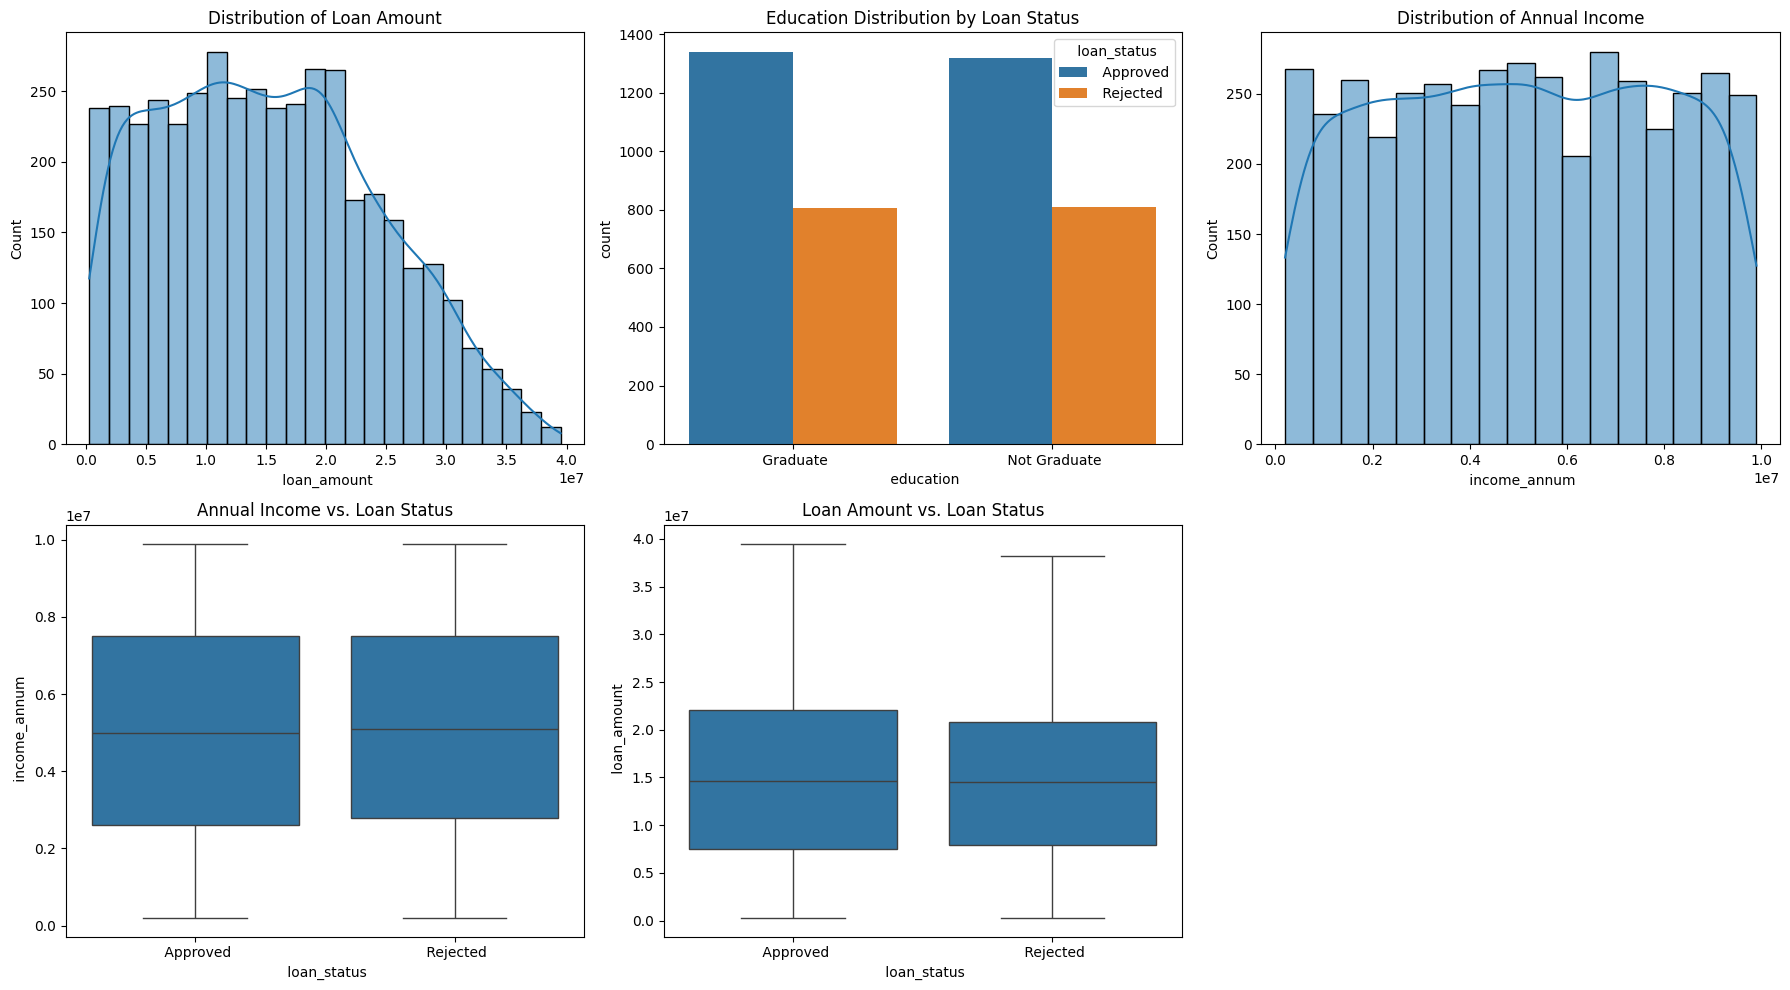

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 10))

# 1. Histogram of 'loan_amount'
plt.subplot(2, 3, 1)
sns.histplot(df[' loan_amount'], kde=True)
plt.title('Distribution of Loan Amount')

# 2. Bar plot of 'education' separated by 'loan_status'
plt.subplot(2, 3, 2)
sns.countplot(data=df, x=' education', hue=' loan_status')
plt.title('Education Distribution by Loan Status')

# 3. Histogram of 'income_annum'
plt.subplot(2, 3, 3)
sns.histplot(df[' income_annum'], kde=True)
plt.title('Distribution of Annual Income')

# 4. Box plot of 'income_annum' and 'loan_status'
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x=' loan_status', y=' income_annum')
plt.title('Annual Income vs. Loan Status')

# 5. Box plot of 'loan_amount' and 'loan_status'
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x=' loan_status', y=' loan_amount')
plt.title('Loan Amount vs. Loan Status')

plt.tight_layout()
plt.show()

## Prepare data for modeling

### Subtask:
Preprocess the data for model training, including encoding categorical variables and splitting the data into training and testing sets.


**Reasoning**:
Identify and one-hot encode the categorical columns, then split the data into features (X) and target (y) and further into training and testing sets.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical columns
categorical_features = df.select_dtypes(include=['object']).columns
# Exclude the target variable from categorical features
categorical_features = categorical_features.drop(' loan_status')

# Create a column transformer to apply one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough'
)

# Separate features (X) and target (y)
X = df.drop(' loan_status', axis=1)
y = df[' loan_status']

# Create a pipeline that first preprocesses the data and then could include a model
# We apply the preprocessing here directly for splitting
X_encoded = preprocessor.fit_transform(X)

# Get the feature names after one-hot encoding
# This part is a bit tricky with remainder='passthrough'. We need to handle the original columns as well.
# For simplicity in splitting, we'll work with the transformed numpy array and keep track of original columns.
# A better approach for full model training would be to include the model in the pipeline.

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

display("Data preprocessing and splitting complete.")
display(f"Shape of X_train: {X_train.shape}")
display(f"Shape of X_test: {X_test.shape}")
display(f"Shape of y_train: {y_train.shape}")
display(f"Shape of y_test: {y_test.shape}")

'Data preprocessing and splitting complete.'

'Shape of X_train: (3415, 14)'

'Shape of X_test: (854, 14)'

'Shape of y_train: (3415,)'

'Shape of y_test: (854,)'

## Train a classification model

### Subtask:
Train either a Logistic Regression or Decision Tree model on the training data.


**Reasoning**:
Train a Logistic Regression model on the training data.



In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train, y_train)

display("Logistic Regression model trained successfully.")

'Logistic Regression model trained successfully.'

## Evaluate the model

### Subtask:
Assess the performance of the trained model using metrics like accuracy and confusion matrix.


**Reasoning**:
Calculate and display the accuracy and confusion matrix of the trained model on the test set.



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
display(f"Accuracy: {accuracy:.2f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
display("Confusion Matrix:")
display(conf_matrix)

'Accuracy: 0.63'

'Confusion Matrix:'

array([[517,  19],
       [294,  24]])

## Summary:

### Data Analysis Key Findings

*   The dataset was successfully loaded and inspected, confirming the presence of columns with leading spaces.
*   No missing values were found in the dataset, eliminating the need for imputation.
*   Visualizations revealed the distributions of loan amount and annual income, and showed initial relationships between education, loan amount, and income with loan status.
*   Categorical features were successfully one-hot encoded, and the data was split into training and testing sets.
*   A Logistic Regression model was trained on the preprocessed data, achieving an accuracy of 0.63 on the test set.
*   The confusion matrix shows that the model correctly predicted 517 non-defaults and 24 defaults, while incorrectly predicting 19 non-defaults as defaults and 294 defaults as non-defaults.

### Insights or Next Steps

*   The model's performance, particularly in identifying defaults (only 24 true positives out of a potential 318 actual defaults), suggests that further feature engineering, model tuning, or exploring different algorithms is necessary to improve its predictive capability for loan defaults.
*   Investigate the `ConvergenceWarning` encountered during Logistic Regression training; scaling the numerical features could potentially resolve this and improve model stability.


## Summary: 📝

### Data Analysis Key Findings 📊

* The dataset was successfully loaded and inspected, confirming the presence of columns with leading spaces.
* No missing values were found in the dataset, eliminating the need for imputation.
* Visualizations revealed the distributions of loan amount and annual income, and showed initial relationships between education, loan amount, and income with loan status.
* Categorical features were successfully one-hot encoded, and the data was split into training and testing sets.
* A Logistic Regression model was trained on the preprocessed data, achieving an accuracy of 0.63 on the test set.
* The confusion matrix shows that the model correctly predicted 517 non-defaults and 24 defaults, while incorrectly predicting 19 non-defaults as defaults and 294 defaults as non-defaults.

### Insights or Next Steps ✨

* The model's performance, particularly in identifying defaults (only 24 true positives out of a potential 318 actual defaults), suggests that further feature engineering, model tuning, or exploring different algorithms is necessary to improve its predictive capability for loan defaults.
* Investigate the `ConvergenceWarning` encountered during Logistic Regression training; scaling the numerical features could potentially resolve this and improve model stability.